In [6]:
# Visualizing Inferred vs True City Locations
import numpy as np
import math as math
import pandas as pd

In [ ]:
pip install geopandas

In [8]:
import matplotlib.pyplot as plt
import geopandas as gpd

In [9]:
# Utilities
def to_spherical(x, y, z):
    theta = np.arcsin(z)*(180/np.pi);
    phi = np.sign(y)*np.arccos(x/np.sqrt(x**2 + y**2))*(180/np.pi)
    return (theta, phi)


def to_cartesian(theta, phi):
    theta = theta*np.pi/180
    phi = phi*np.pi/180
    x = np.cos(phi) * np.cos(theta)
    y = np.sin(phi) * np.cos(theta)
    z = np.sin(theta)
    return (x, y, z)

In [10]:
#Testing Our Algorithm
debiased_city_locations_spherical_true = np.loadtxt("debiased_city_loactions_spherical.txt")
biased_city_locations_spherical_true = np.loadtxt("biased_city_loactions_spherical.txt")
uniform_data_set_city_locations_spherical_true = np.loadtxt("uniform_data_set_city_loactions_spherical.txt")


rotated_debiased_city_locations = np.loadtxt("inferred_debiased_city_locations.txt").T
rotated_biased_city_locations = np.loadtxt("inferred_biased_city_locations.txt").T
rotated_uniform_data_set_city_locations = np.loadtxt("inferred_uniform_data_set_city_locations.txt").T

rotated_spherical_debiased_locations = np.zeros((320,2))
rotated_spherical_biased_locations = np.zeros((320,2))
rotated_spherical_uniform_data_set_locations = np.zeros((320,2))

for i in range(320):      
  rotated_spherical_debiased_locations[i,:] = to_spherical(rotated_debiased_city_locations[i,0],
                                                      rotated_debiased_city_locations[i,1],
                                                      rotated_debiased_city_locations[i,2])
  
  rotated_spherical_biased_locations[i,:] = to_spherical(rotated_biased_city_locations[i,0],
                                                      rotated_biased_city_locations[i,1],
                                                      rotated_biased_city_locations[i,2])
  
  rotated_spherical_uniform_data_set_locations[i,:] = to_spherical(rotated_uniform_data_set_city_locations[i,0],
                                                      rotated_uniform_data_set_city_locations[i,1],
                                                      rotated_uniform_data_set_city_locations[i,2])  

<ipython-input-18-63cdf813c6b7>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


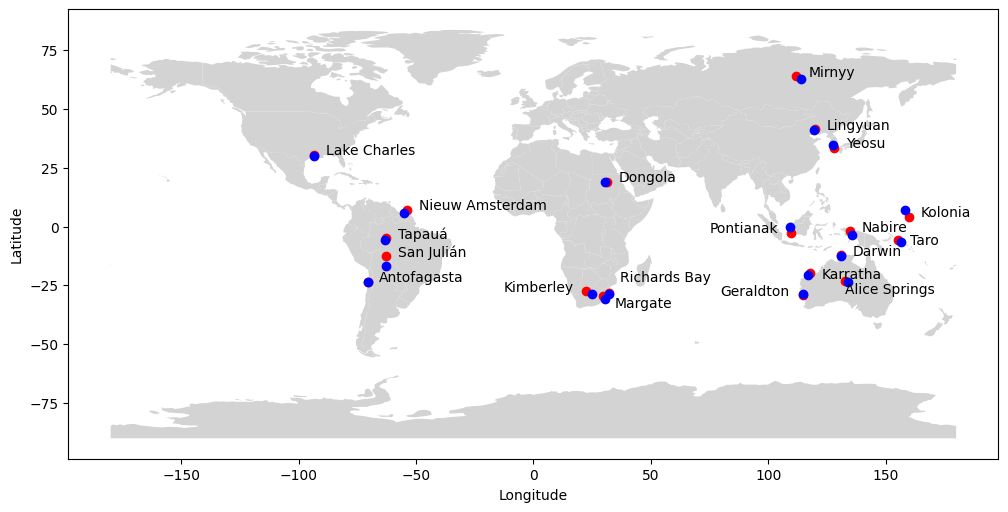

In [18]:
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
debiased_city_names = pd.read_csv("debiased_names.txt",header = None);
debiased_city_names= debiased_city_names.values.tolist();

# Creating axes and plotting world map
fig, ax = plt.subplots(figsize=(12, 6))
worldmap.plot(color="lightgrey", ax=ax)
plt.scatter(rotated_spherical_debiased_locations[:20,1],
            rotated_spherical_debiased_locations[:20,0],
            color = "red")
plt.scatter(debiased_city_locations_spherical_true[:20,1],
            debiased_city_locations_spherical_true[:20,0],
            color = "blue")
for i in range(20): # A bunch of annoying moving so that text does not overlap
  if i==0:
    plt.annotate(list(debiased_city_names)[i][0], 
               (rotated_spherical_debiased_locations[i,1]+5,
            rotated_spherical_debiased_locations[i,0]+5))
    continue
  if i==9:
    plt.annotate(list(debiased_city_names)[i][0], 
               (rotated_spherical_debiased_locations[i,1]+5,
            rotated_spherical_debiased_locations[i,0]-2))
    continue
  if i==10:
    plt.annotate(list(debiased_city_names)[i][0], 
               (rotated_spherical_debiased_locations[i,1]+5,
            rotated_spherical_debiased_locations[i,0]-5))
    continue
  if i==11:
    plt.annotate(list(debiased_city_names)[i][0], 
               (rotated_spherical_debiased_locations[i,1]-35,
            rotated_spherical_debiased_locations[i,0]))
    continue
  if i==13:
    plt.annotate(list(debiased_city_names)[i][0], 
               (rotated_spherical_debiased_locations[i,1],
            rotated_spherical_debiased_locations[i,0]-5))
    continue
  if i==15:
    plt.annotate(list(debiased_city_names)[i][0], 
               (rotated_spherical_debiased_locations[i,1]-35,
            rotated_spherical_debiased_locations[i,0]))
    continue
  if i==17:
    plt.annotate(list(debiased_city_names)[i][0], 
               (rotated_spherical_debiased_locations[i,1]-35,
            rotated_spherical_debiased_locations[i,0]))
    continue
  if i==2:
    plt.annotate(list(debiased_city_names)[i][0], 
               (rotated_spherical_debiased_locations[i,1]+5,
            rotated_spherical_debiased_locations[i,0]-2))
    continue
  plt.annotate(list(debiased_city_names)[i][0], 
               (rotated_spherical_debiased_locations[i,1]+5,
            rotated_spherical_debiased_locations[i,0]))
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.savefig("inferred_debiased_on_map.png")

In [15]:
debiased_city_names[:20]


[['Richards Bay'],
 ['Lingyuan'],
 ['Karratha'],
 ['Yeosu'],
 ['Darwin'],
 ['Nabire'],
 ['Dongola'],
 ['Nieuw Amsterdam'],
 ['Kolonia'],
 ['Taro'],
 ['Margate'],
 ['Kimberley'],
 ['Tapauá'],
 ['Alice Springs'],
 ['Mirnyy'],
 ['Geraldton'],
 ['Antofagasta'],
 ['Pontianak'],
 ['San Julián'],
 ['Lake Charles']]

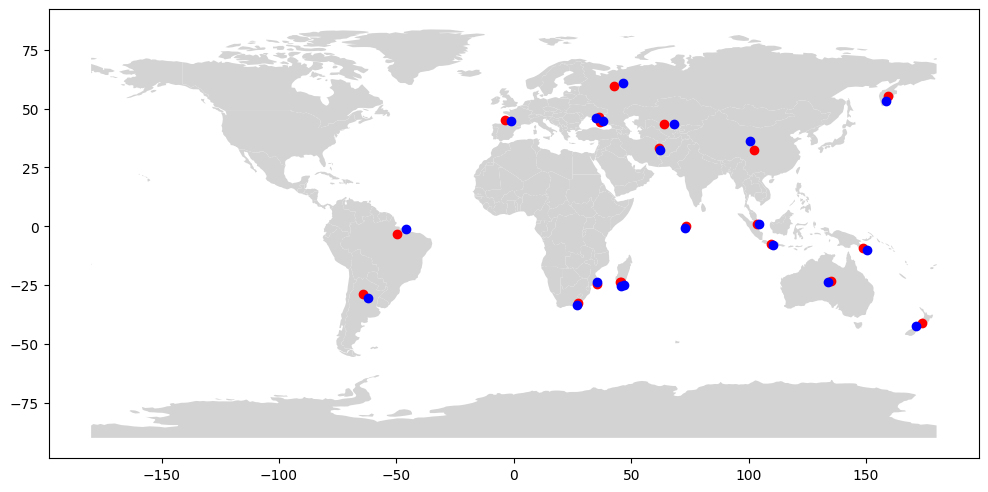

In [12]:
# Creating axes and plotting world map
fig, ax = plt.subplots(figsize=(12, 6))
worldmap.plot(color="lightgrey", ax=ax)
plt.scatter(rotated_spherical_biased_locations[:20,1],
            rotated_spherical_biased_locations[:20,0],
            color = "red")
plt.scatter(biased_city_locations_spherical_true[:20,1],
            biased_city_locations_spherical_true[:20,0],
            color = "blue")
plt.savefig("inferred_biased_on_map.png")

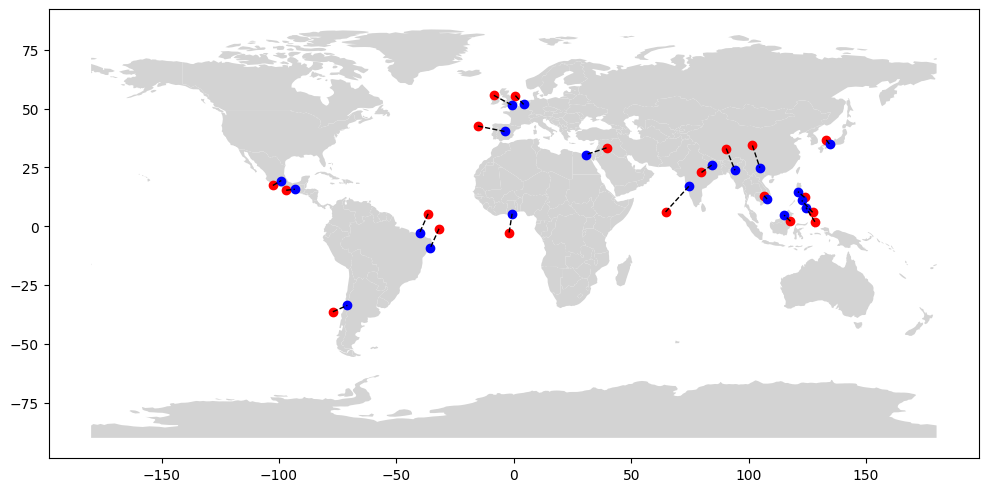

In [13]:
# Creating axes and plotting world map
fig, ax = plt.subplots(figsize=(12, 6))
worldmap.plot(color="lightgrey", ax=ax)
plt.scatter(rotated_spherical_uniform_data_set_locations[:20,1],
            rotated_spherical_uniform_data_set_locations[:20,0],
            color = "red")
plt.scatter(uniform_data_set_city_locations_spherical_true[:20,1],
            uniform_data_set_city_locations_spherical_true[:20,0],
            color = "blue")

for i in range(20):
  plt.plot([rotated_spherical_uniform_data_set_locations[i,1],
           uniform_data_set_city_locations_spherical_true[i,1]],
            [rotated_spherical_uniform_data_set_locations[i,0],
            uniform_data_set_city_locations_spherical_true[i,0]],color = "black",linewidth= 1, linestyle= "--")



plt.savefig("inferred_uniform_data_set_on_map.png")